In [1]:
using Plots

In [7]:
using StatsBase

In [8]:
using Distributions

In [4]:
pyplot(size=(800,600))

Plots.PyPlotBackend()

# A13 - Markov Ungleichung

### Illustration zum (schwachen) Gesetz der großen Zahlen

In [5]:
# Ziehe n Samples aus der Summe von N normalverteilen Zufallsvariablen

function NormalSum(n, N)
    samples = Array{Float64}(n)
    for k in 1:n
        samples[k] += 1/N * sum(randn(N))
    end
    return samples
end

NormalSum (generic function with 1 method)

Wir ziehen $10^5$ Samples aus einer Summe von $N=1,10,100$ Normalverteilungen. Die Verteilung der Summe wird immer schärfer. Konkret nimmt die Varianz mit $1/N$ ab.


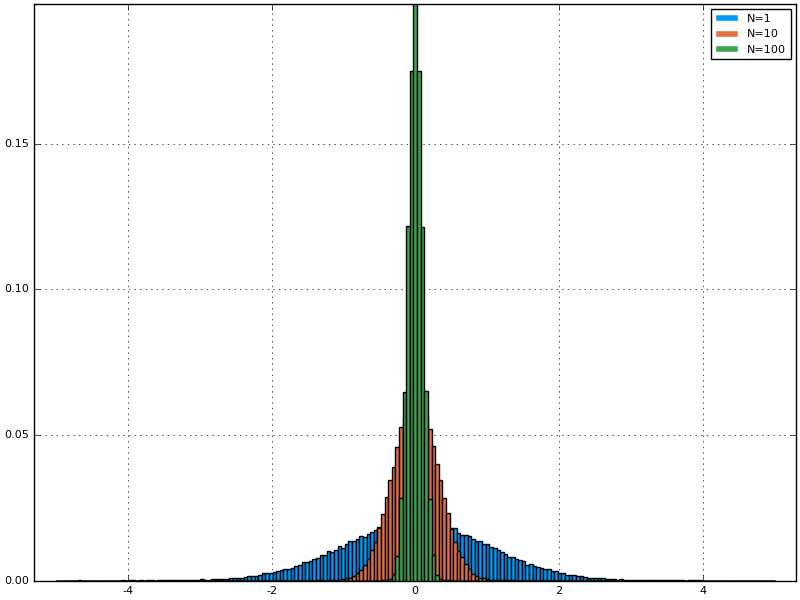

In [6]:
n=100000
plt = bar(alpha=0.5) # Neuen Bar-Plot erstellen
for N in [1,10,100]
    # Histogram erstellen
    hist = fit(Histogram, NormalSum(n,N), linspace(-5,+5,200), closed=:left)
    # und in eine gemeinsame Grafik plotten
    bar!(plt, hist.edges, hist.weights/n, lab="N=$N")
end
display(plt)

---

# A14 - Ising Paramagnet

Bei sehr niedrigen Temperaturen (gemessen in Einheiten der Kopplungskonstanten), führt bereits ein kleines externes Magnetfeld zur Ausprägung einer (vollständigen) Magnetisierung.

Höhere Temperaturen und die damit verbundenen thermischen Fluktuationen zerstören diese Ordnung teilweise. Es werden viel größere Feldstärken benötigt um die Spins auszurichten.


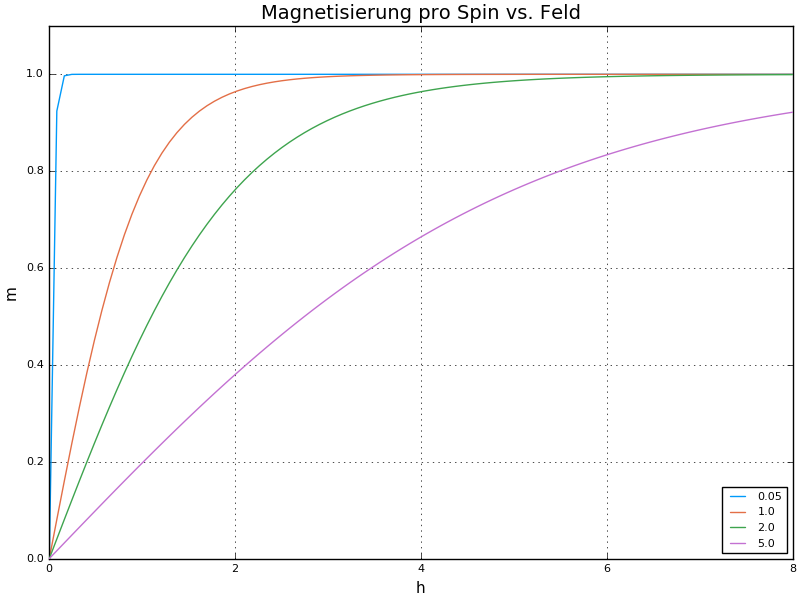

In [9]:
TT = [0.05,1.0,2.0, 5.0] # Temperaturen
plot(linspace(0,8,100), [x->tanh(x/T) for T in TT],
    ylim=(0.,1.1),xlabel="h", ylabel="m", lab=TT', title="Magnetisierung pro Spin vs. Feld")